In [74]:
import warnings
warnings.filterwarnings("ignore")

import shapely                 #needed to set geopandas geometry 
from shapely.wkt import loads  #needed to set geopandas geometry

import pandas as pd            #for DataFrame and analysis
import geopandas as gpd        #for mapping and spatial aggregation
import mapclassify as mp   #to view quantitative classification summaries

# Graphics
import matplotlib.pyplot as plt
from matplotlib import colors

#Data Handling
import shapely                 #needed to set geopandas geometry 
from shapely.wkt import loads  #needed to set geopandas geometry

# Analysis
import numpy as np
import geopandas as gpd
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

from pysal.model import spreg
from libpysal import weights
from pysal.explore import esda

In [75]:
IMD = pd.read_csv("merged_lsoa_census_imd_with_imd_score.csv")

In [76]:
IMD.head()

LSOA21CD                   LSOA21NM   MSOA21CD                  MSOA21NM  \
0  E01000001        City of London 001A  E02000001        City of London 001   
1  E01000002        City of London 001B  E02000001        City of London 001   
2  E01000003        City of London 001C  E02000001        City of London 001   
3  E01000005        City of London 001E  E02000001        City of London 001   
4  E01000006  Barking and Dagenham 016A  E02000017  Barking and Dagenham 016   

     LAD22CD               LAD22NM  LSOA21KM2  LSOAP21 CHGIND  \
0  E09000001        City of London    0.12987      1.0      U   
1  E09000001        City of London    0.22842      1.0      U   
2  E09000001        City of London    0.05905      1.0      U   
3  E09000001        City of London    0.18958      1.0      U   
4  E09000002  Barking and Dagenham    0.14654      1.0      U   

                                            geometry  ...  QualOt11_m21  fid  \
0  POLYGON ((532105.3119999999 182010.5739999991,...  ...            67    1   
1  POLYGON ((532634.4970000004 181926.01600000076...  ...            31    2   
2  POLYGON ((532135.1381999999 182198.13099999912...  ...            71    3   
3  POLYGON ((533808.0175999999 180767.77439999953...  ...            94    4   
4  POLYGON ((545122.0489999996 184314.93099999987...  ...           181    5   

   LSOA Code                  LSOA Name                  GeoPackage Unique ID  \
0  E01000001        City of London 001A  c625aea8-6d73-4b2a-be76-4d5c44cad9f8   
1  E01000002        City of London 001B  52c878e9-ac68-4886-b4a8-fea9cd241a70   
2  E01000003        City of London 001C  b9d8faca-d489-478d-8ce6-acaf76186d7d   
3  E01000005        City of London 001E  15e1417d-537c-4845-9820-fc7596bd59b0   
4  E01000006  Barking and Dagenham 016A  8a6c4ee0-c0ff-4736-9cfa-fb12a6d50da0   

   LSOA IMD Ranking  IMD Decile  Shape__Area  Shape__Length  \
0             26525           8  334994.0316    4234.236578   
1             31203          10  589221.8237    4349.851316   
2             25913           8  152357.6440    1967.056494   
3             14807           5  488921.8829    3656.415102   
4             10917           4  378300.9717    3157.756418   

   Index of Multiple Deprivation (IMD) Score  
0                                        6.2  
1                                        5.1  
2                                       19.4  
3                                       28.7  
4                                       19.8  

[5 rows x 79 columns]

In [77]:
gdf = gpd.GeoDataFrame(IMD)  #geopandas
gdf['geometry'] = gdf['geometry'].apply(lambda x: loads(x))  #from shapely
gdf = gdf.set_geometry('geometry')

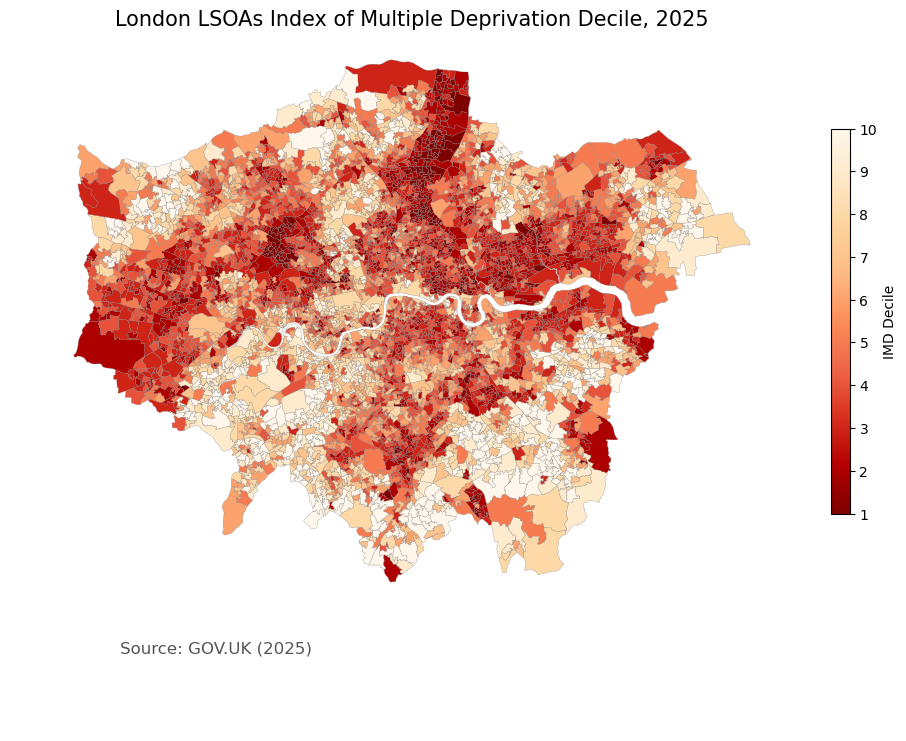

In [78]:
fig, ax = plt.subplots(figsize=(12, 10))

gdf.plot(
    column='IMD Decile',
    cmap='OrRd_r',
    linewidth=0.2,
    edgecolor='grey',
    legend=True,
    ax=ax,
    legend_kwds={
        'shrink': 0.5,           
        'label': 'IMD Decile',   
        'orientation': 'vertical'  
    },
    missing_kwds={'color': 'lightgrey', "label": "No Data"}
)


ax.annotate('Source: GOV.UK (2025)',
             xy=(0.1, 0.1), xycoords='figure fraction', 
             horizontalalignment='left', verticalalignment='top', 
             fontsize=12, color='#555555')

ax.set_title("London LSOAs Index of Multiple Deprivation Decile, 2025", fontsize=15)
ax.set_axis_off()
plt.show()

In [79]:
IMD2 = pd.read_csv("File_2_IoD2025_Domains_of_Deprivation.csv")

In [80]:
IMD = pd.read_csv("merged_lsoa_census_imd_with_imd_score.csv")

In [81]:
merged = IMD.merge(
    IMD2,
    left_on="LSOA21CD",
    right_on="LSOA code (2021)",
    how="left"
)

In [82]:
merged_clean = merged[[
    "LSOA21CD",
    "LSOA21NM",
    "IMD Decile",
    "LSOA IMD Ranking",
    "Income Rank (where 1 is most deprived)",
    "Income Decile (where 1 is most deprived 10% of LSOAs)",
    "Index of Multiple Deprivation (IMD) Score",
    "Education, Skills and Training Rank (where 1 is most deprived)",
    "Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)", 
    "geometry"
]]

In [83]:
gdf = gpd.GeoDataFrame(merged_clean)  #geopandas
gdf['geometry'] = gdf['geometry'].apply(lambda x: loads(x))  #from shapely
gdf = gdf.set_geometry('geometry')
merged_clean.head()

LSOA21CD                   LSOA21NM  IMD Decile  LSOA IMD Ranking  \
0  E01000001        City of London 001A           8             26525   
1  E01000002        City of London 001B          10             31203   
2  E01000003        City of London 001C           8             25913   
3  E01000005        City of London 001E           5             14807   
4  E01000006  Barking and Dagenham 016A           4             10917   

   Income Rank (where 1 is most deprived)  \
0                                   33730   
1                                   33669   
2                                   25167   
3                                   14836   
4                                    7519   

   Income Decile (where 1 is most deprived 10% of LSOAs)  \
0                                                 10       
1                                                 10       
2                                                  8       
3                                                  5       
4                                                  3       

   Index of Multiple Deprivation (IMD) Score  \
0                                        6.2   
1                                        5.1   
2                                       19.4   
3                                       28.7   
4                                       19.8   

   Education, Skills and Training Rank (where 1 is most deprived)  \
0                                              33755                
1                                              33672                
2                                              30273                
3                                              15886                
4                                              11134                

   Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)  \
0                                                 10                               
1                                                 10                               
2                                                  9                               
3                                                  5                               
4                                                  4                               

                                            geometry  
0  POLYGON ((532105.3119999999 182010.5739999991,...  
1  POLYGON ((532634.4970000004 181926.01600000076...  
2  POLYGON ((532135.1381999999 182198.13099999912...  
3  POLYGON ((533808.0175999999 180767.77439999953...  
4  POLYGON ((545122.0489999996 184314.93099999987...

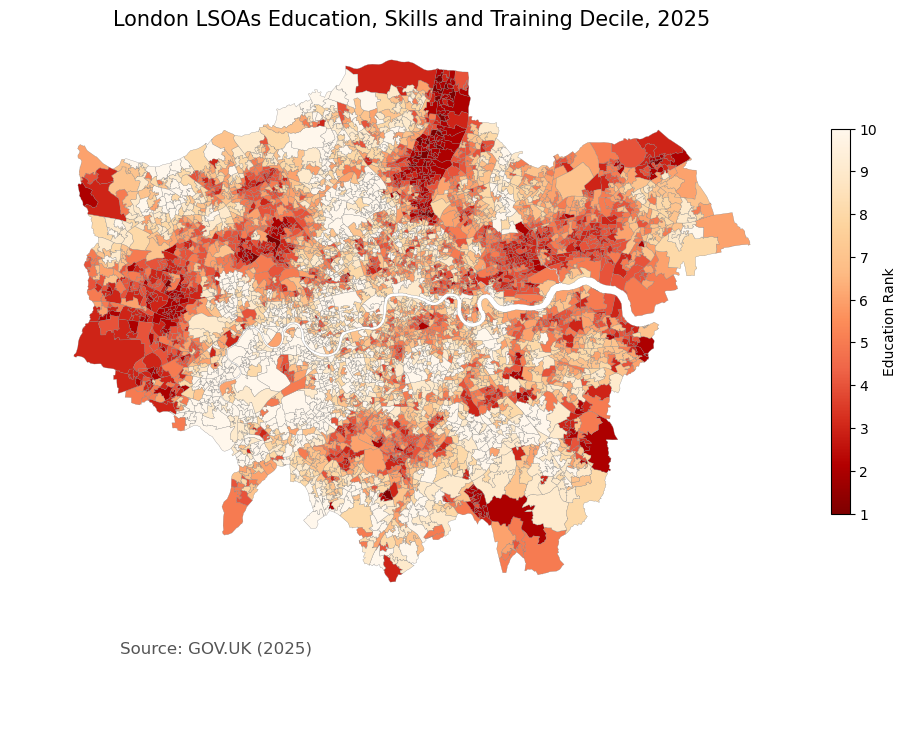

In [84]:
fig, ax = plt.subplots(figsize=(12, 10))

gdf.plot(
    column= "Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)",
    cmap='OrRd_r',
    linewidth=0.2,
    edgecolor='grey',
    legend=True,
    ax=ax,
    legend_kwds={
        'shrink': 0.5,           
        'label': 'Education Rank',   
        'orientation': 'vertical'  
    },
    missing_kwds={'color': 'lightgrey', "label": "No Data"}
)


ax.annotate('Source: GOV.UK (2025)',
             xy=(0.1, 0.1), xycoords='figure fraction', 
             horizontalalignment='left', verticalalignment='top', 
             fontsize=12, color='#555555')

ax.set_title("London LSOAs Education, Skills and Training Decile, 2025", fontsize=15)
ax.set_axis_off()
plt.show()

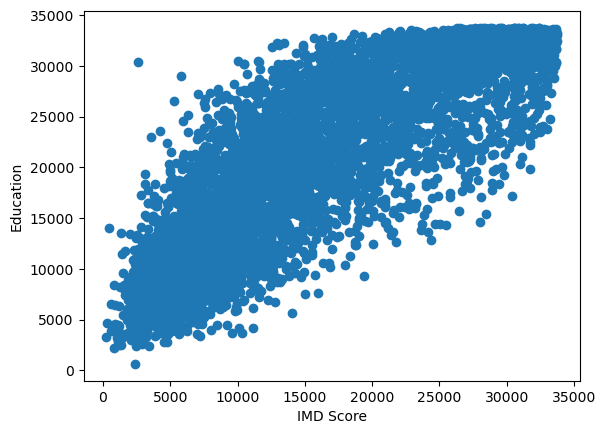

In [85]:
fig, ax = plt.subplots(1)

plt.scatter(gdf['LSOA IMD Ranking'], gdf['Education, Skills and Training Rank (where 1 is most deprived)'])

ax.set_ylabel('Education')
ax.set_xlabel('IMD Score')

plt.show()

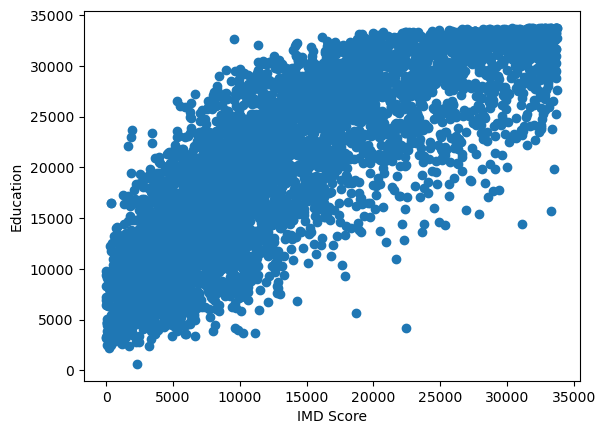

In [86]:
fig, ax = plt.subplots(1)

plt.scatter(gdf['Income Rank (where 1 is most deprived)'], gdf['Education, Skills and Training Rank (where 1 is most deprived)'])

ax.set_ylabel('Education')
ax.set_xlabel('IMD Score')

plt.show()

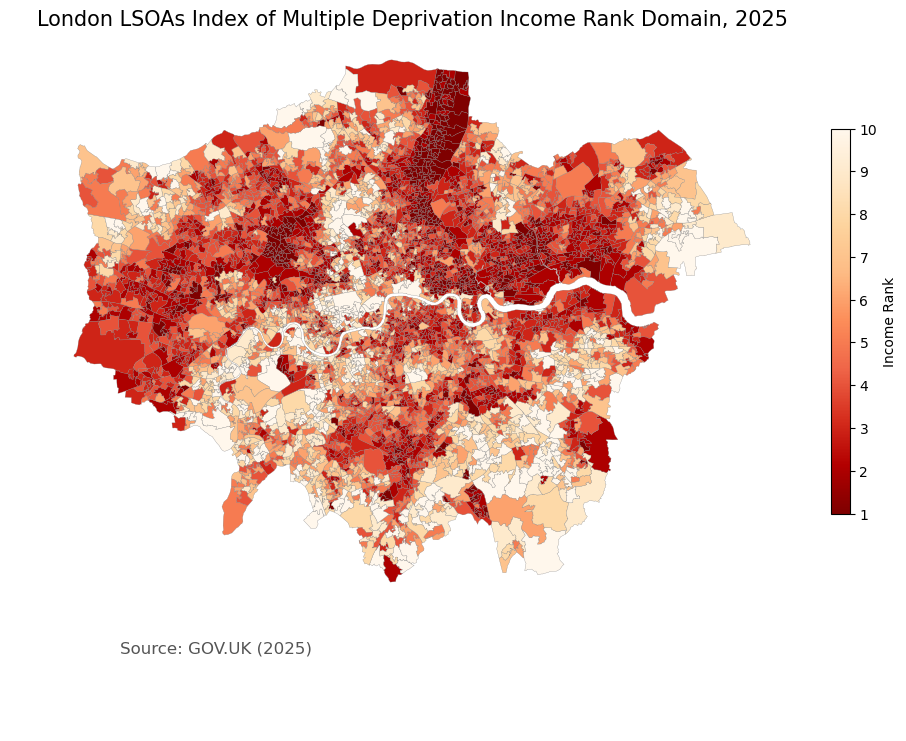

In [87]:
fig, ax = plt.subplots(figsize=(12, 10))

gdf.plot(
    column='Income Decile (where 1 is most deprived 10% of LSOAs)',
    cmap='OrRd_r',
    linewidth=0.2,
    edgecolor='grey',
    legend=True,
    ax=ax,
    legend_kwds={
        'shrink': 0.5,           
        'label': 'Income Rank',   
        'orientation': 'vertical'  
    },
    missing_kwds={'color': 'lightgrey', "label": "No Data"}
)


ax.annotate('Source: GOV.UK (2025)',
             xy=(0.1, 0.1), xycoords='figure fraction', 
             horizontalalignment='left', verticalalignment='top', 
             fontsize=12, color='#555555')

ax.set_title("London LSOAs Index of Multiple Deprivation Income Rank Domain, 2025", fontsize=15)
ax.set_axis_off()
plt.show()

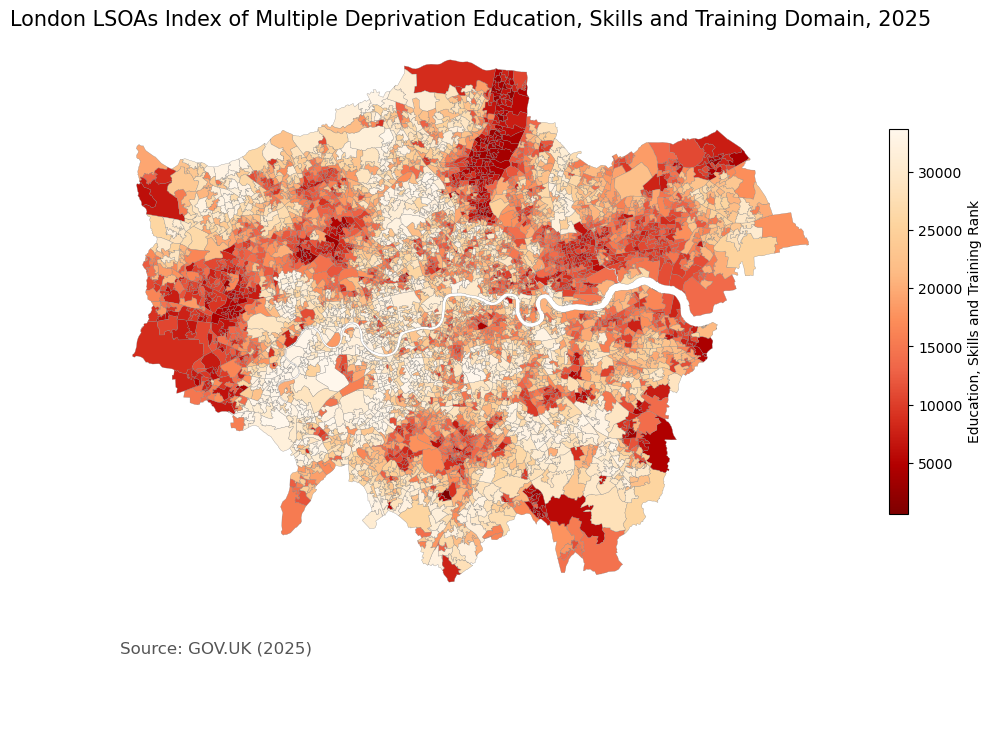

In [88]:
fig, ax = plt.subplots(figsize=(12, 10))

gdf.plot(
    column='Education, Skills and Training Rank (where 1 is most deprived)',
    cmap='OrRd_r',
    linewidth=0.2,
    edgecolor='grey',
    legend=True,
    ax=ax,
    legend_kwds={
        'shrink': 0.5,           
        'label': 'Education, Skills and Training Rank',   
        'orientation': 'vertical'  
    },
    missing_kwds={'color': 'lightgrey', "label": "No Data"}
)


ax.annotate('Source: GOV.UK (2025)',
             xy=(0.1, 0.1), xycoords='figure fraction', 
             horizontalalignment='left', verticalalignment='top', 
             fontsize=12, color='#555555')

ax.set_title("London LSOAs Index of Multiple Deprivation Education, Skills and Training Domain, 2025", fontsize=15)
ax.set_axis_off()
plt.show()

In [89]:
gdf = gdf.rename(columns={
    "Education, Skills and Training Rank (where 1 is most deprived)": "Education"
})
gdf = gdf.rename(columns={
    "Income Rank (where 1 is most deprived)": "Income"
})

l4_mod = smf.ols("Education ~ Income", data=gdf)
l4_mod_fit = l4_mod.fit()
print(l4_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              Education   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     9528.
Date:                Wed, 17 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:19:38   Log-Likelihood:                -49560.
No. Observations:                4994   AIC:                         9.912e+04
Df Residuals:                    4992   BIC:                         9.914e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9795.8155    126.991     77.138      0.0

In [90]:
gdf["edu_pct"] = gdf["Education"] / gdf["Education"].max()
gdf["income_pct"] = gdf["Income"] / gdf["Income"].max()

In [91]:
l4_mod = smf.ols("edu_pct ~ income_pct", data=gdf)
l4_mod_fit = l4_mod.fit()
print(l4_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                edu_pct   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     9528.
Date:                Wed, 17 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:19:39   Log-Likelihood:                 2511.4
No. Observations:                4994   AIC:                            -5019.
Df Residuals:                    4992   BIC:                            -5006.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2902      0.004     77.138      0.0

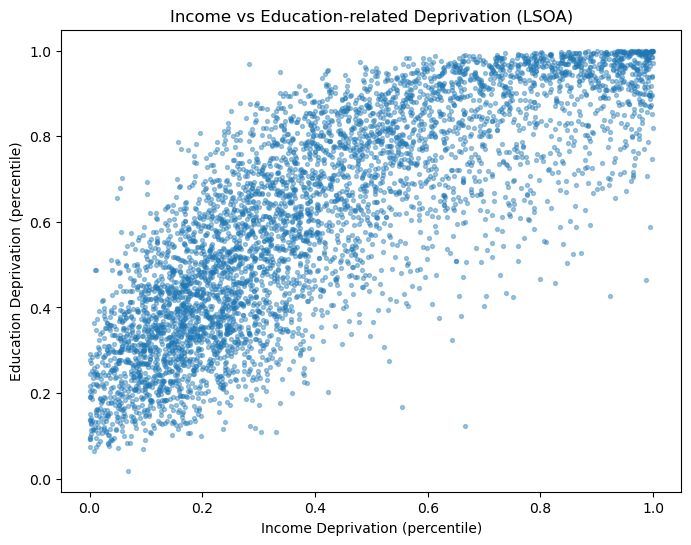

In [92]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(
    gdf["income_pct"],
    gdf["edu_pct"],
    s=8,
    alpha=0.4
)

ax.set_xlabel("Income Deprivation (percentile)")
ax.set_ylabel("Education Deprivation (percentile)")
ax.set_title("Income vs Education-related Deprivation (LSOA)")

plt.show()

In [93]:
wKNN8 = weights.KNN.from_dataframe(gdf, k=8)
wKNN8.transform = 'r'

In [94]:
moran = esda.moran.Moran(gdf['edu_pct'], wKNN8)
print(round(moran.I,3))
print(round(moran.p_sim,3))

0.632
0.001


In [95]:
moran = esda.moran.Moran(gdf['income_pct'], wKNN8)
print(round(moran.I,3))
print(round(moran.p_sim,3))

0.567
0.001


In [96]:
l4_moran = esda.moran.Moran(l4_mod_fit.resid_pearson, 
                                              wKNN8)
print(round(l4_moran.I,3))
print(round(l4_moran.p_sim,3))

0.554
0.001


In [97]:
imd_uni_mod = smf.ols("edu_pct ~ income_pct", data=gdf)
imd_uni_mod_fit = imd_uni_mod.fit()

imd_uni_moran = esda.moran.Moran(imd_uni_mod_fit.resid_pearson, wKNN8)
print(round(imd_uni_moran.I, 3))
print(round(imd_uni_moran.p_sim, 3))

0.554
0.001


In [98]:
variable_name = ['income_pct']

imd_lagm = spreg.ML_Lag(
    gdf[['edu_pct']].values,   
    gdf[variable_name].values,   
    w=wKNN8,
    name_y='edu_pct',
    name_x=variable_name
)

print(imd_lagm.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     edu_pct                Number of Observations:        4994
Mean dependent var  :      0.5968                Number of Variables   :           3
S.D. dependent var  :      0.2496                Degrees of Freedom    :        4991
Pseudo R-squared    :      0.7855
Spatial Pseudo R-squared:  0.6304
Log likelihood      :   3588.1931
Sigma-square ML     :      0.0134                Akaike info criterion :   -7170.386
S.E of regression   :      0.1156                Schwarz criterion     :   -7150.838

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [99]:
imd_lagm_moran = esda.moran.Moran(imd_lagm.u, wKNN8)
print(round(imd_lagm_moran.I, 3))
print(round(imd_lagm_moran.p_sim, 3))

0.172
0.001


In [107]:
### Libraries to deal with spatial and non spatial data
import geopandas as gpd
import pandas as pd
import numpy as np

# Libraries required for visualisations
import matplotlib.pyplot as plt
import matplotlib as mpl

# Libraries for linear regression
import spreg
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

# Libraries required to perform GWR and MGWR
import pysal
import libpysal
from pysal.model import mgwr
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap
from descartes import PolygonPatch


#Data Handling
import shapely                 #needed to set geopandas geometry 
from shapely.wkt import loads  #needed to set geopandas geometry

from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)
warnings.filterwarnings("ignore")
# If you still see warnings, don't worry because we're using newer version of numba but older version of libpysal - just rerun and ignore for now

In [108]:
cent = gdf.geometry.centroid
gdf["long"] = cent.x
gdf["lat"]  = cent.y

gdf["income_pct"] = gdf["Income"] / gdf["Income"].max()
gdf["edu_pct"]    = gdf["Education"] / gdf["Education"].max()

gdf = gdf.rename(columns={
    "Income Rank (where 1 is most deprived)": "Income",
    "Education, Skills and Training Rank (where 1 is most deprived)": "Education"
})
    


In [111]:
coordinate_cols = ['lat', 'long']
indep_vars = ['income_pct']
dep_var = 'edu_pct'
geom_col = 'geometry'

all_cols = np.append(coordinate_cols, indep_vars)
all_cols = np.append(all_cols, dep_var)
all_cols = np.append(all_cols, geom_col)

gdf_reduced = gdf[all_cols]
gdf_reduced.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lat         4994 non-null   float64 
 1   long        4994 non-null   float64 
 2   income_pct  4994 non-null   float64 
 3   edu_pct     4994 non-null   float64 
 4   geometry    4994 non-null   geometry
dtypes: float64(4), geometry(1)
memory usage: 195.2 KB


In [112]:
corr = gdf_reduced[indep_vars].corr()
corr.style.background_gradient(cmap='coolwarm')

In [113]:
gdf_reduced[['income_pct', 'edu_pct']].corr().style.background_gradient(cmap='coolwarm')

In [131]:
ols_results_smf = smf.ols("edu_pct ~ income_pct", data=gdf_reduced).fit()
print(ols_results_smf.summary())

                            OLS Regression Results                            
Dep. Variable:                edu_pct   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     9528.
Date:                Wed, 17 Dec 2025   Prob (F-statistic):               0.00
Time:                        22:39:53   Log-Likelihood:                 2511.4
No. Observations:                4994   AIC:                            -5019.
Df Residuals:                    4992   BIC:                            -5006.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2902      0.004     77.138      0.0

In [132]:
aic_ols_sm = ols_results_sm.aic
aic_ols_smf = ols_results_smf.aic
aic_ols_pysal = ols_results_pysal.aic
print(aic_ols_sm, aic_ols_smf, aic_ols_pysal)

-5018.773091964871 -5018.773091964871 -5018.773091964871


In [133]:
wKNN8 = libpysal.weights.KNN.from_dataframe(gdf_reduced, k = 8)  # create weight Matrix
wKNN8.transform = 'r'

# Now run the model
slm_results = spreg.ML_Lag(y, X, w = wKNN8)
print(slm_results.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     edu_pct                Number of Observations:        4994
Mean dependent var  :      0.5968                Number of Variables   :           3
S.D. dependent var  :      0.2496                Degrees of Freedom    :        4991
Pseudo R-squared    :      0.7855
Spatial Pseudo R-squared:  0.6304
Log likelihood      :   3588.1931
Sigma-square ML     :      0.0134                Akaike info criterion :   -7170.386
S.E of regression   :      0.1156                Schwarz criterion     :   -7150.838

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [117]:
sem_results = spreg.ML_Error(y, X, w = wKNN8)
print(sem_results.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     edu_pct                Number of Observations:        4994
Mean dependent var  :      0.5968                Number of Variables   :           2
S.D. dependent var  :      0.2496                Degrees of Freedom    :        4992
Pseudo R-squared    :      0.6562
Log likelihood      :   4113.2505
Sigma-square ML     :      0.0101                Akaike info criterion :   -8222.501
S.E of regression   :      0.1004                Schwarz criterion     :   -8209.469

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         0.32463    

In [118]:
u = gdf_reduced['long']
v = gdf_reduced['lat']
coords = list(zip(u,v)) 
yvector = y.values.reshape((-1,1)) 

In [120]:
bw_selector = Sel_BW(coords, yvector, X.values, spherical = False, fixed = False) 
bw_optimum = bw_selector.search(bw_min = 2) 
print(bw_optimum)

32.0


In [121]:
gwr_results = GWR(coords, yvector, X, bw_optimum).fit()
print(gwr_results.summary())

Model type                                                         Gaussian
Number of observations:                                                4994
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            106.949
Log-likelihood:                                                    2511.387
AIC:                                                              -5018.773
AICc:                                                             -5016.768
BIC:                                                             -42404.885
R2:                                                                   0.656
Adj. R2:                                                              0.656

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [128]:
aic_ols = aic_ols_sm
aic_slm = slm_results.aic
aic_sem = sem_results.aic
aic_gwr = gwr_results.aic


aics_summary = pd.DataFrame()
aics_summary['AIC'] = [aic_ols, aic_slm, aic_sem, aic_gwr]
aics_summary['method'] = ['OLS', 'SLM', 'SEM', 'GWR']

aics_summary

AIC method
0 -5018.773092    OLS
1 -7170.386161    SLM
2 -8222.500998    SEM
3 -9518.513704    GWR

In [129]:
gdf_reduced["gwr_X0"] = gwr_results.params[:, 0]
gdf_reduced["gwr_income_pct"] = gwr_results.params[:, 1]

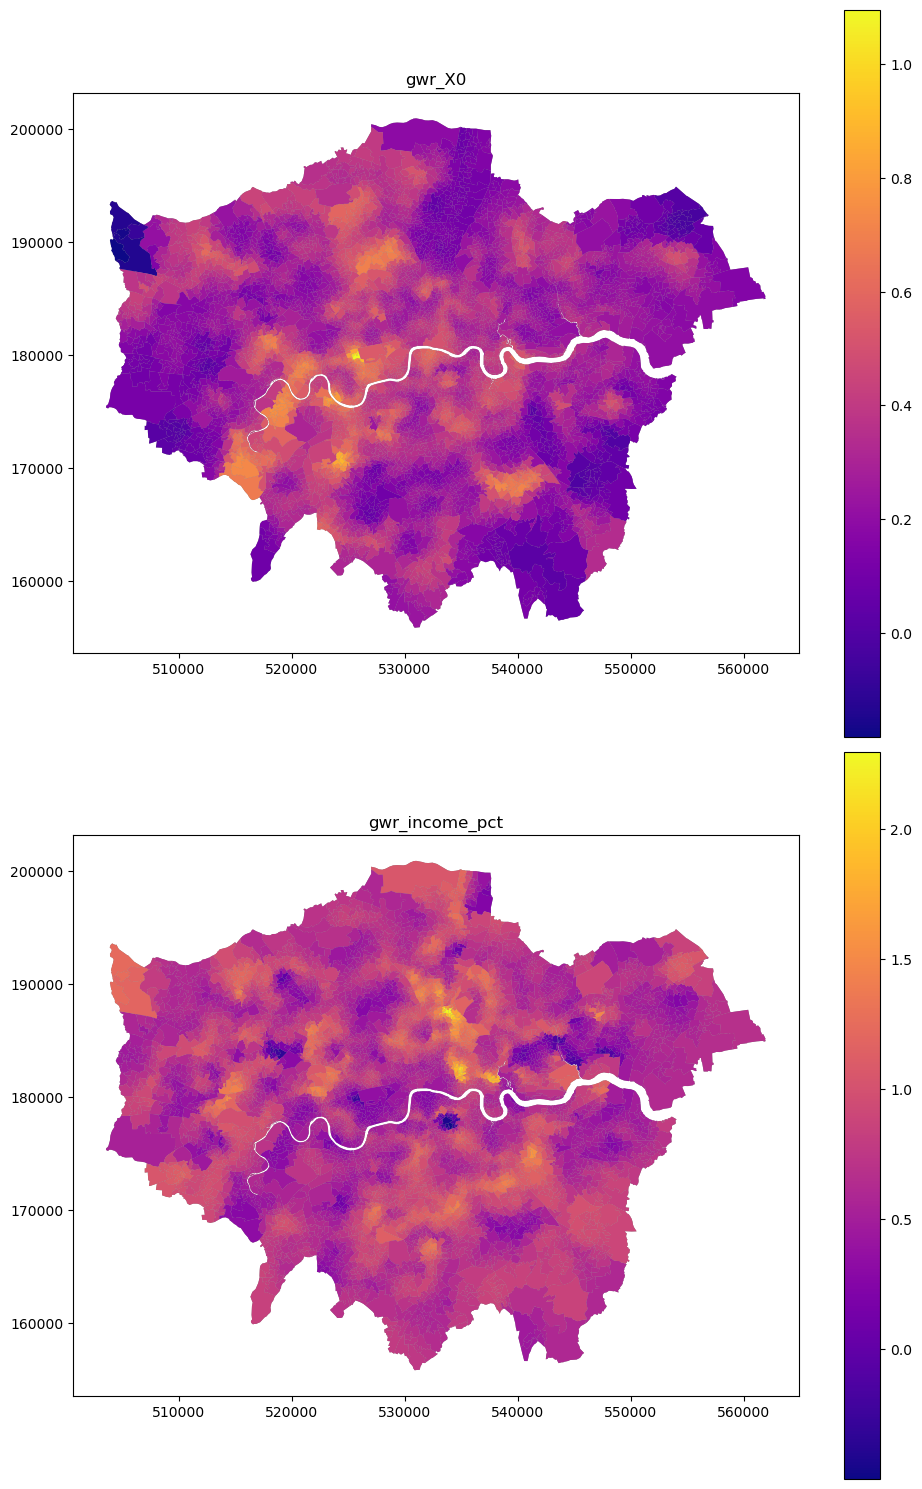

In [130]:
par_cols = ["gwr_X0", "gwr_income_pct"]     # parameters you want to map
npar = len(par_cols)

fig, all_axs = plt.subplots(ncols=1, nrows=npar, figsize=(10, 15))

# If npar=1, all_axs isn't iterable the same way — this keeps it consistent
if npar == 1:
    all_axs = [all_axs]

for i, axgwr in enumerate(all_axs):
    cmap = plt.cm.plasma

    gwr_col = par_cols[i]
    vmin = np.nanmin(gdf_reduced[gwr_col])
    vmax = np.nanmax(gdf_reduced[gwr_col])

    axgwr.set_title(gwr_col)
    gdf_reduced.plot(ax=axgwr, color='gray')  # base map
    gdf_reduced.plot(gwr_col, ax=axgwr, cmap=cmap, vmin=vmin, vmax=vmax, legend=True)

plt.tight_layout()
plt.show()


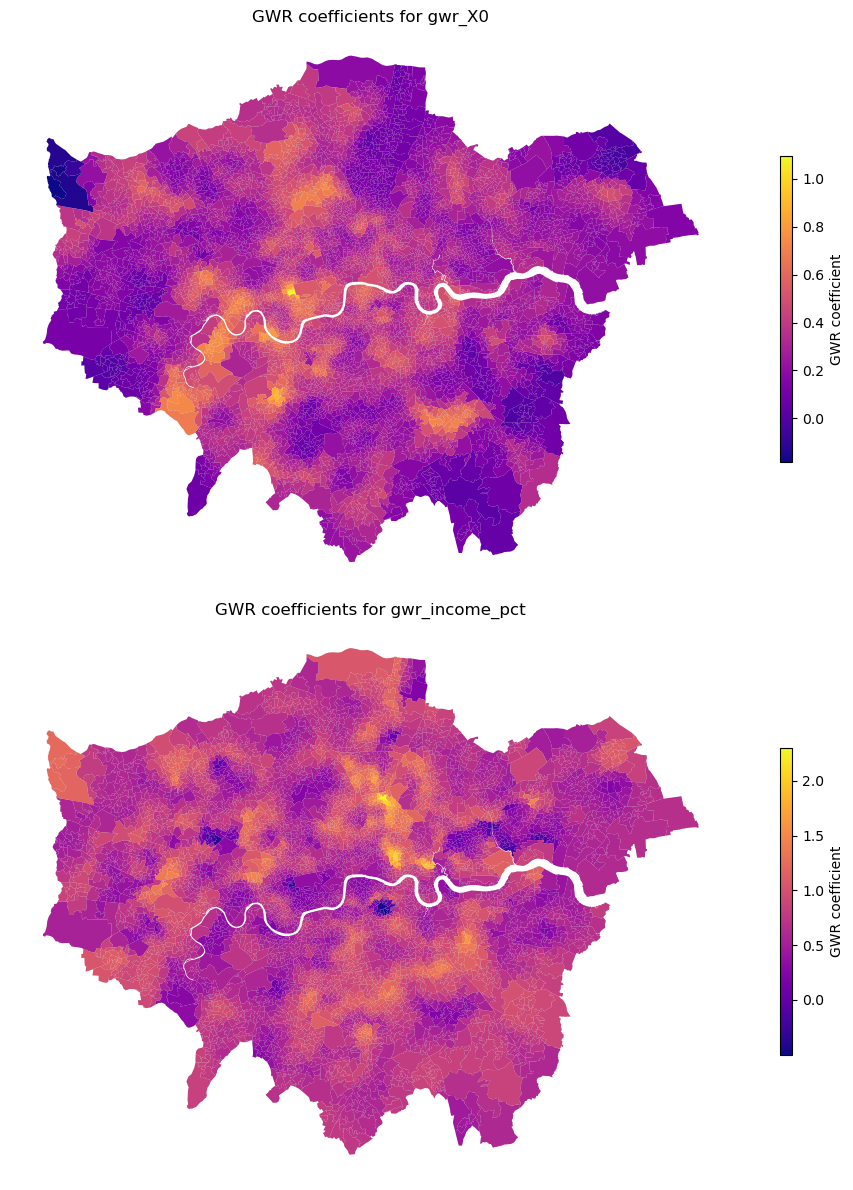

In [135]:
par_cols = ["gwr_X0", "gwr_income_pct"]
npar = len(par_cols)

fig, all_axs = plt.subplots(
    nrows=npar,
    ncols=1,
    figsize=(10, 6 * npar)
)

if npar == 1:
    all_axs = [all_axs]

for i, axgwr in enumerate(all_axs):
    
    gwr_col = par_cols[i]
    cmap = plt.cm.plasma

    vmin = np.nanmin(gdf_reduced[gwr_col])
    vmax = np.nanmax(gdf_reduced[gwr_col])

    gdf_reduced.plot(
        ax=axgwr,
        color="lightgrey",
        edgecolor="white",
        linewidth=0.2
    )

    gdf_reduced.plot(
        column=gwr_col,
        ax=axgwr,
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        legend=True,
        legend_kwds={
            "shrink": 0.55,        
            "aspect": 25,         
            "label": "GWR coefficient"
        }
    )

    axgwr.set_title(
        f"GWR coefficients for {gwr_col}",
        fontsize=12
    )
    axgwr.axis("off")

plt.tight_layout()
plt.show()

